### Perceptron Algorithm 
Implementation of the Algorithm for managing the weights and the bias of a single perceptron

![title](perceptron.jpg)

In [47]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

### Step Function
Function that generates the output of the perceptron based on the values of its input weighted by the input weight and the bias

![title](step.jpg)

In [48]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

### Nucleus of the Perceptron
Components of the Peceptron that makes the actual prediction based on the inputs, weights and bias

![title](nucleus.jpg)

In [49]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [50]:
# Implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    wrong_pred = 0
    
    for i, x in enumerate(X):
        y_pred = prediction(x, W, b)
        if y_pred != y[i]:
            wrong_pred += 1
            if y_pred == 0:
                # Increment the Weights
                W[0] += learn_rate * x[0]
                W[1] += learn_rate * x[1]
                b += learn_rate
            else:
                # decrement the Weights
                W[0] -= learn_rate * x[0]
                W[1] -= learn_rate * x[1]
                b -= learn_rate
    accuracy = (len(y)-wrong_pred)/len(y)
    print('Accuracy {}'.format(accuracy))
    
    
    return W, b

### Plotting the Line

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def print_plot(c1, c2, idx, X, y):
    x = np.linspace(0, 2, 50)
    col = ""
    plt.figure(idx)
    plt.plot(x, c1 * x + c2, color = 'black')
    for i, point in enumerate(X):
        if y[i] <= 0:
            col = "red"
        else:
            col = "blue"
        plt.plot(point[0], point[1], marker='o', markersize=3, color=col)
    plt.title("Iteration {}, C1: {}, C2: {}".format(idx, c1, c2))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)
    plt.show()

### Update the Weights 
Find the optimal line that categorize correctly most of the points

In [56]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        c1 = -W[0]/W[1]
        c2 = -b/W[1]
        print_plot(c1, c2, i, X, y)

### Load the Data and Run
See how the line changes over the iterations

Accuracy 0.5


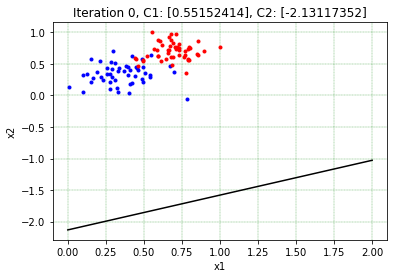

Accuracy 0.5


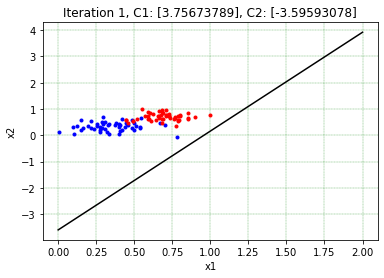

Accuracy 0.78


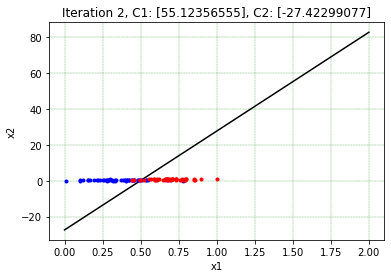

Accuracy 0.91


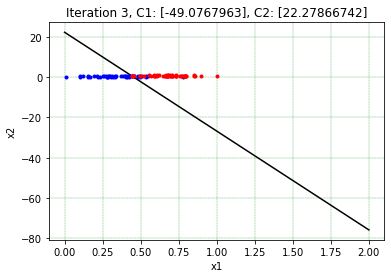

Accuracy 0.89


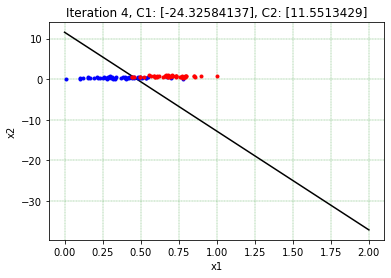

Accuracy 0.9


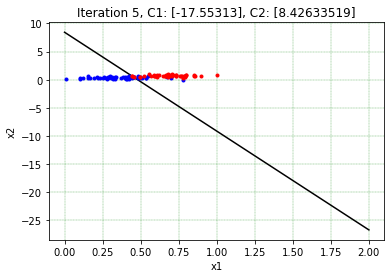

Accuracy 0.9


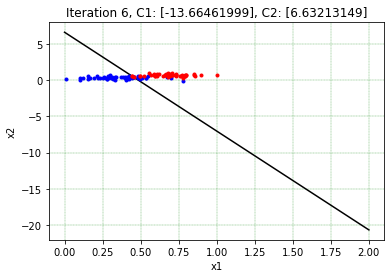

Accuracy 0.89


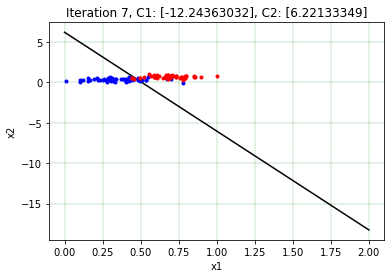

Accuracy 0.9


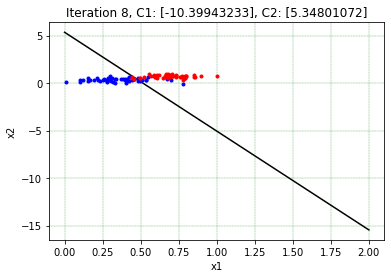

Accuracy 0.9


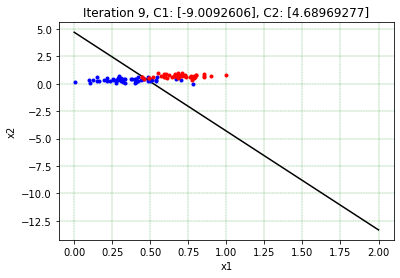

Accuracy 0.9


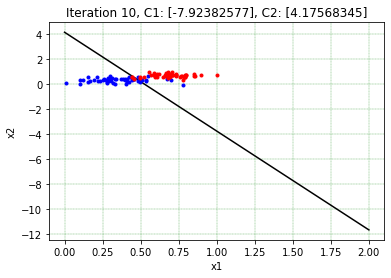

Accuracy 0.9


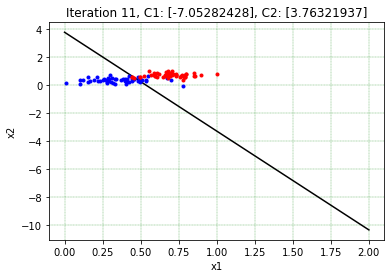

Accuracy 0.9


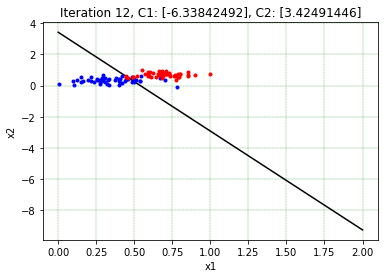

Accuracy 0.9


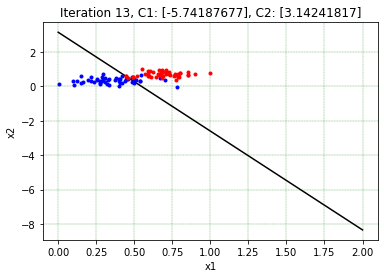

Accuracy 0.9


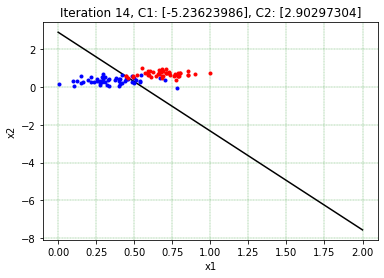

Accuracy 0.9


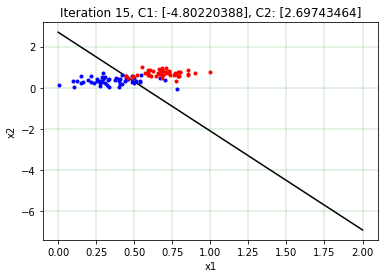

Accuracy 0.9


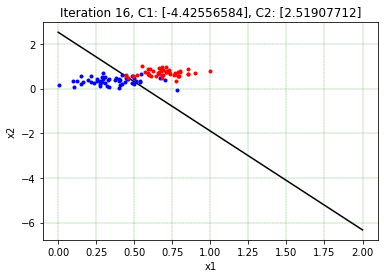

Accuracy 0.9


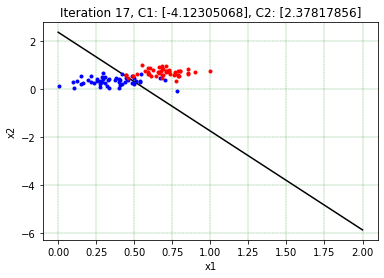

Accuracy 0.9


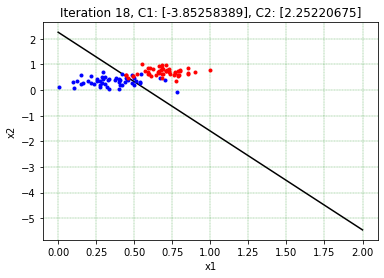

Accuracy 0.9


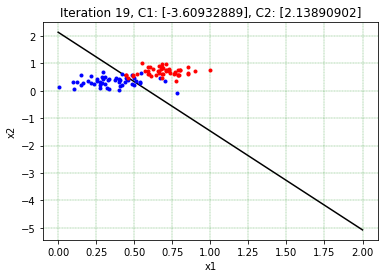

Accuracy 0.9


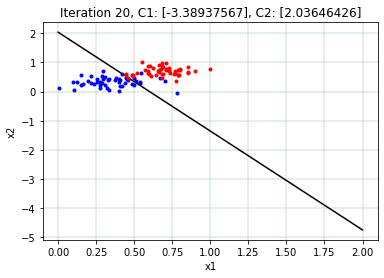

Accuracy 0.9


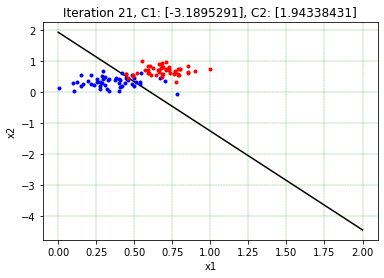

Accuracy 0.9


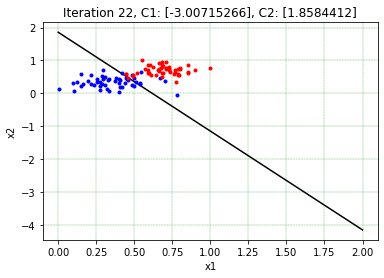

Accuracy 0.9


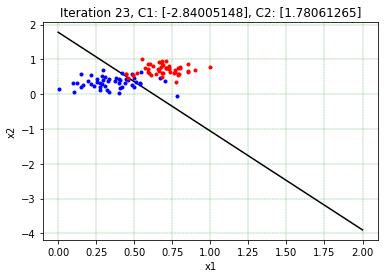

Accuracy 0.9


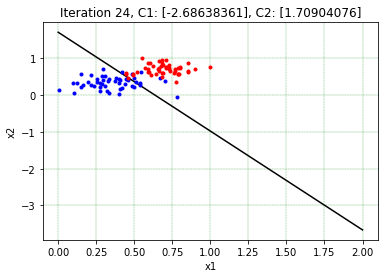

In [57]:
import pandas as pd

df = pd.read_csv('data.csv', header=None)
X = df.iloc[:, 0:2].to_numpy()
y = df.iloc[:, 2].to_numpy()


trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25)